> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2017` folder** 

# Week 4

*Thursday, September 21, 2017*

## Outline

This week is about getting data from the big ol' Internet, using Wikipedia as an example. The main task today is to crawl the Wikipedia pages of all Marvel characters using the MediaWiki API. There are three parts to this exercise.

* Learning how to retrieve data from the MediaWiki API using Python
* Downloading all Marvel character Wikipedia articles
* Exploring the data

## Material

*Data Science From Scratch* Chapter 9, 10.

* *Chapter 9 - Getting Data*: You can skim through the first bit if you already know how to load data in and out of a Python kernel, but give the sections about scraping and APIs a thorough read.

* *Chapter 10 - Working with Data*: All of this is important. Something you will be using again and again, however, is rescaling and dimensionality reduction. Don't leave this lecture without understanding what these are.

## Exercises

**Why use an API?** You could just go ahead and scrape the HTML from a Wikipedia page as simple as:

    import requests as rq
    rq.get("https://en.wikipedia.org/wiki/Batman").text
    
Well... to navigate data in XML format is not always easy. Therefore, MediaWiki offers its users direct use of its API. To load the MediaWiki markup using the API, one would do something like:

    rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&titles=Batman&prop=revisions&rvprop=content").json()
    
This returns a JSON object inside which you can find all sorts of information about the page, including the latest revision of the Batman page markup.

### Part 0: Learn to access Wikipedia data with Python

Figure out how Wikipedia markup works .You'll need to know a bit about formatting of MediaWiki pages so that you can parse the markup that you retrieve from wikipedia. See http://www.mediawiki.org/wiki/Help:Formatting. In particular, look into how links work and how tables work and make sure you can answer the following questions.

>**Ex. 4.0.1**: How do you link to another Wikipedia page from within a Wikipedia-page, using the wikimedia markup? Write down a simple example that links to a specific section in another page.

[[Wikipedia:page#section|text]]

> **Ex. 4.0.2**: Can you create a simple table with the same content as the one below, using wikimedia markup?

>| True Positive  | False Positive |
| -------------- |:--------------:|
| False Negative | True Negative  |

{| class='wikitable'
|True Positive  
| False Positive
----
 | False Negative || True Negative  |}

> **Ex. 4.0.3**: Figure out how to download pages from Wikipedia. Familiarize yourself with [the API](http://www.mediawiki.org/wiki/API:Main_page) and learn how to extract the markup. The API query that returns the markup of the Batman page is:
    
>`api.php?format=json&action=query&titles=Batman&prop=revisions&rvprop=content`

>1. Explain the structure of this query. What are the parameters and arguments and what do they mean? What happens if you remove `rvprop=content`?
2. Download the Batman page data from the API. Extract the markup from the JSON object and save it to a file called "batman.txt".

1. query the file api.php.  The rest of the paramters are self-explanatory variables, like that the action is a query, format is json, title is Batman, etc. Rvprop controls what content/revisions are delivered

In [7]:
import requests as rq

batmanhtml = rq.get('https://en.wikipedia.org/w/api.php?format=json&action=query&titles=Batman&prop=revisions&rvprop=content').json()
data = batmanhtml['query']['pages']['4335']['revisions'][0]['*']

print(data)

{{About|the fictional character}}
{{pp-semi-indef}}
{{pp-move-indef}}
{{Use mdy dates|date=October 2015}}
{{Infobox comics character
|image          = Batman Detective Comics Vol 2 1.png<!--Do NOT change this image without consensus from the Talk Page-->
|imagesize      =
|converted      = y
|caption        = Art by [[Tony Daniel]]
|alt            = Batman descends upon Gotham City. Art by Tony Daniel.
|publisher      = [[DC Comics]]
|debut          = ''[[Detective Comics]]'' #27<br />(cover date May 1939 /<br>release date March 1939)<!-- "Debut" indicates the first appearance of a character, not a change to the character's backstory. -->
|creators       = {{plainlist|
*[[Bob Kane]]
*[[Bill Finger]]<ref>[[Ron Goulart|Goulart, Ron]], ''Comic Book Encyclopedia'' ([[HarperCollins|Harper Entertainment]], New York, 2004) {{ISBN|978-0-06-053816-3}}</ref>
}}
|alter_ego      = Bruce Wayne<!-- Do not enter a middle name. He has been depicted with too many different middle names to enter a speci

### Part 1: Get data (main part)

For a good part of this course we will be working with data from Wikipedia. Today, your objective is to crawl a large dataset with good and bad characters from the Marvel characters.

>**Ex. 4.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

In [5]:
from __future__ import print_function, division
q = 'https://en.wikipedia.org/w/api.php?'
args = 'format=json&list=categorymembers&action=query&prop=revisions&rvprop=content&cmlimit=500'

# get the data
data = rq.get(q + args + '&cmtitle=Category:Marvel_Comics_superheroes').json()
hero_list = [h['title'] for h in data['query']['categorymembers']]
while 'continue' in data:
    cnt = data['continue']['cmcontinue']
    data = rq.get(q+args+'&cmtitle=Category:Marvel_Comics_superheroes&cmcontinue=' + cnt).json()
    hero_list += [h['title'] for h in data['query']['categorymembers']]

data = rq.get(q + args + '&cmtitle=Category:Marvel_Comics_supervillains').json()
villain_list = [v['title'] for v in data['query']['categorymembers']]
while 'continue' in data:
    cnt = data['continue']['cmcontinue']
    data = rq.get(q+args+'&cmtitle=Category:Marvel_Comics_supervillains&cmcontinue=' + cnt).json()
    villain_list += [h['title'] for h in data['query']['categorymembers']]

print("There are {} heroes and {} villains.".format(len(hero_list), len(villain_list)))
[print(h, end=', ') for h in hero_list]
print()
[print(v, end=', ') for v in villain_list]
print()
print("There are {} characters playing both sides.".format(len([h for h in hero_list if h in villain_list])))

# getting jaccard index
heroes = set(hero_list)
villains = set(villain_list)

print("The jaccard similarity index is " + str(len(heroes.intersection(villains))/len(heroes.union(villains))))

There are 966 heroes and 1301 villains.


Abigail Brand, Abyss (comics), Adam X the X-Treme, Adept (comics), Agent (comics), Agent X (Marvel Comics), El Aguila, Ahura (comics), Air-Walker, Ajax (comics), Alaris (comics), Albert (comics), Alice Nugent, Liz Allan, Alpha (Marvel Comics), Alpha the Ultimate Mutant, American Ace, American Dream (comics), American Eagle (Marvel Comics), Americop, Aminedi, Andromeda (Marvel Comics), Angel (Thomas Halloway), Angel Dust (comics), Angela (comics), Dirk Anger, Annex (comics), Anole (comics), Ant-Man (Scott Lang), Anthem (comics), Ape-X, Arabian Knight (comics), Aragorn (comics), Anya Corazon, Archer (Marvel Comics), Ardina, Ares (Marvel Comics), Arkon, Armageddon (Marvel Comics), Armor (comics), Armory (comics), Arnold Roth (Captain America), Astra (Imperial Guard), Vance Astro, Vance Astrovik, Athena (Marvel Comics), Auric (comics), Aurora (comics), Backhand (comics), Balder (comics), Banshee (comics), Rikki Barnes, Base (comics), Battering Ram (comics), Battlestar (comics), Batwing (Ma

8-Ball (comics), Abomination (comics), Absalom (comics), Absorbing Man, Abyss (comics), Achilles (Pantheon), Acrobat (comics), Adam II, Adonis (comics), Adrenazon, Adria (comics), Adversary (comics), Advisor (comics), Aegis (Lady of All Sorrows), Aftershock (comics), Agent Axis, Agron (comics), Aguja, List of incarnations of Spider-Man, Air-Walker, Airborne (comics), Ajax (comics), Ajaxis, Al-Tariq, Albino (comics), Aldebron, Alex (comics), Abdul Alhazred (comics), Allatou, Alpha the Ultimate Mutant, Alternative versions of Magneto, Amatsu-Mikaboshi (comics), American Samurai, Ammo (comics), Amphibion, Amphibius (comics), Anaconda (comics), Anelle, Ani-Mator, Animus (Marvel Comics), Anne-Marie Cortez, Annihilus, Answer (comics), Ape-Man, Ape-X, Apocalypse (comics), Apocalypse Twins, Aquarius (Marvel Comics), Aqueduct (comics), Aquon, Arcade (Marvel Comics), Arclight (comics), Ares (Marvel Comics), Aries (comics), Arkon, Armadillo (comics), Armless Tiger Man, Aron (comics), Miss Arrow, 

>**Ex. 4.1.2**: Using this list you now want to download all data you can about each character. However, because this is potentially Big Data, you cannot store it your computer's memory. Therefore, you have to store it in your harddrive somehow. 
* Create three folders on your computer, one for *heroes*, one for *villains*, and one for *ambiguous*.
* For each character, download the markdown on their pages and save in a new file in the corresponding hero/villain/ambiguous folder.

>*Hint: Some of the characters have funky names. The first problem you may encounter is problems with encoding. To solve that you can call `.encode('utf-8')` on your markup string. Another problem you may encounter is that characters have a slash in their names. This, you should just replace with some other meaningful character.*

In [6]:
heroes = set(hero_list)
villains = set(villain_list)

ambig_chars = heroes.intersection(villains)
heroes = heroes.difference(villains)
villains = villains.difference(ambig_chars)

args = 'format=json&action=query&prop=revisions&rvprop=content&titles='
folder = "ex4data/ambiguous/"
for c in ambig_chars:
    d = rq.get(q + args + c).json()
    ID = d['query']['pages'].keys()[0]
    data = d['query']['pages'][ID]['revisions'][0]['*']
    f = open(folder + c.encode('UTF-8') +".md", 'w')
    f.write(data.encode('UTF-8'))
    
folder = "ex4data/heroes/"
for c in heroes:
    d = rq.get(q + args + c).json()
    ID = d['query']['pages'].keys()[0]
    data = d['query']['pages'][ID]['revisions'][0]['*']
    f = open(folder + c.encode('UTF-8') +".md", 'w')
    f.write(data.encode('UTF-8'))
    
folder = "ex4data/villains/"
for c in villains:
    d = rq.get(q + args + c).json()
    ID = d['query']['pages'].keys()[0]
    data = d['query']['pages'][ID]['revisions'][0]['*']
    f = open(folder + c.encode('UTF-8') +".md", 'w')
    f.write(data.encode('UTF-8'))


KeyboardInterrupt: 

### Part 2: Explore data

#### Page lengths

>**Ex. 4.2.1.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `normed=True`. Other distribution plots are fine too, though.*

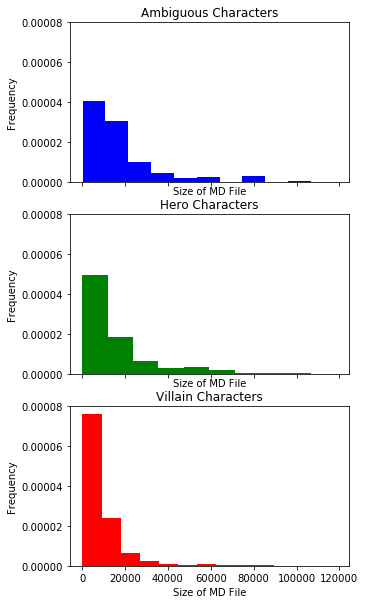

"\n    based on the plots shown below, it's clear that there are more minor characters than major ones.  \n    many more minor villains, whereas heroes are less skewed in this regard.  ambiguous characters \n    have even less of this skew, implying that maybe characters depicted as playing both sides are discussed more\n    in-depth.  This makes sense, as they'd generally require more background than a simple minor villain.\n"

In [9]:
import os, numpy as np, matplotlib.pyplot as plt

ambig_sizes = []
hero_sizes = []
villain_sizes = []

# iterate through each directory, adding the size of each file to the list.
for fn in os.listdir('ex4data/ambiguous'):
    ambig_sizes.append(os.stat('ex4data/ambiguous/'+fn).st_size)
    
for fn in os.listdir('ex4data/heroes'):
    hero_sizes.append(os.stat('ex4data/heroes/'+fn).st_size)
    
for fn in os.listdir('ex4data/villains'):
    villain_sizes.append(os.stat('ex4data/villains/'+fn).st_size)
    
f, (aPlt, hPlt, vPlt) = plt.subplots(3, 1, figsize=(5, 10), sharex=True, sharey=True)

aPlt.set_ylabel("Frequency")
aPlt.set_xlabel("Size of MD File")
aPlt.set_title("Ambiguous Characters")
aPlt.hist(ambig_sizes, normed=True, color='blue')

vPlt.set_ylabel("Frequency")
vPlt.set_xlabel("Size of MD File")
vPlt.set_title("Villain Characters")
vPlt.hist(villain_sizes, normed=True, color='red')

hPlt.set_ylabel("Frequency")
hPlt.set_xlabel("Size of MD File")
hPlt.set_title("Hero Characters")
hPlt.hist(hero_sizes, normed=True, color='green')

plt.show()

"""
    based on the plots shown below, it's clear that there are more minor characters than major ones.  
    many more minor villains, whereas heroes are less skewed in this regard.  ambiguous characters 
    have even less of this skew, implying that maybe characters depicted as playing both sides are discussed more
    in-depth.  This makes sense, as they'd generally require more background than a simple minor villain.
"""

>**Ex. 4.2.1.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

In [ ]:
file_sizes = {}
for dr in os.listdir('ex4data/'):
    file_sizes.update({dr: []})
    for fn in os.listdir('ex4data/' + dr):
        file_sizes[dr].append((fn, os.stat('ex4data/'+dr+'/'+fn).st_size))
  

for cat in file_sizes.keys():
    file_sizes[cat].sort(key=lambda e: e[1], reverse=True)
    print("Longest pages in " + cat)
    print()
    [print(name) for name, size in file_sizes[cat][0:10]]
    print()

#### Timeline

>**Ex. 4.2.2.1**: We are interested to know if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* Visualize the amount of heroes introduces over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`.*

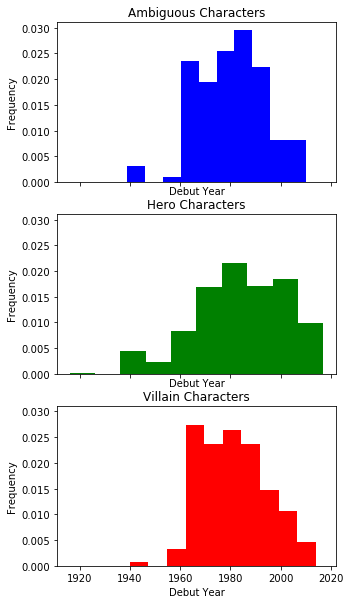

In [24]:
import re
# iterate through each file
cats = ["heroes", "villains", "ambiguous"]
debuts = {"heroes": [], "villains": [], "ambiguous": []}

# iterate through each category
for cat in cats:
    # iterate through files in each category's folder
    for fn in os.listdir('ex4data/' + cat):
        # open the file and get the text data inside. 
        f = open('ex4data/' + cat + '/' + fn)
        markup_text = f.read()
        # use regex to get pieces of data, and if the data we get isn't empty, save that
        debut_line = re.findall(r"debut.+?\n", markup_text)
        if debut_line:
            yrs = re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])
            if yrs:
                yr = yrs[0][:-1]
                debuts[cat].append(int(yr))
               
# plot lists

f, (aPlt, hPlt, vPlt) = plt.subplots(3, 1, figsize=(5, 10), sharex=True, sharey=True)

aPlt.set_ylabel("Frequency")
aPlt.set_xlabel("Debut Year")
aPlt.set_title("Ambiguous Characters")
aPlt.hist(debuts['ambiguous'], normed=True, color='blue')

vPlt.set_ylabel("Frequency")
vPlt.set_xlabel("Debut Year")
vPlt.set_title("Villain Characters")
vPlt.hist(debuts['villains'], normed=True, color='red')

hPlt.set_ylabel("Frequency")
hPlt.set_xlabel("Debut Year")
hPlt.set_title("Hero Characters")
hPlt.hist(debuts['heroes'], normed=True, color='green')

plt.show()

# skip missing points, only use first year if multiple

#### Alliances

>**Ex. 4.2.3.1**: In this exercise we want to extract the team affiliations for each character. Each character may be associated with multiple teams. In the info table of the markup, the teams are listed in the *alliances*-field.
* Write a regex extracts the *alliances*-field.
* Write a regex that extracts each team from the *alliance*-field.
* Count the number of members for each team (hint: use a `defaultdict`).
* Inspect your team names. Are there any that result from inconsistencies in the information on the pages? How do you deal with this?
* Print the 10 largest alliances and their number of members.